In [ ]:
#THE SPARKS FOUNDATION INTERNSHIP
#TASK 2
#PREDICTION USING UNSUPERVISED MACHINE LEARNING
#KAYODE EMEKA OLADELE

In [107]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [109]:
import os
# Setting the environment variable to avoid memory leak issue
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Step 1: Load the Data
file_path = 'C:\\Users\\folas\\Downloads\\Iris.csv'
iris = pd.read_csv(file_path)


In [110]:
#Exploring the Data
print(iris.head())
print(iris.describe())
print(iris.info())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%   

In [113]:
#Preparing the Data(Drop the 'Id' and 'Species' column if present)
features = iris.drop(columns=['Id', 'Species'], errors='ignore')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


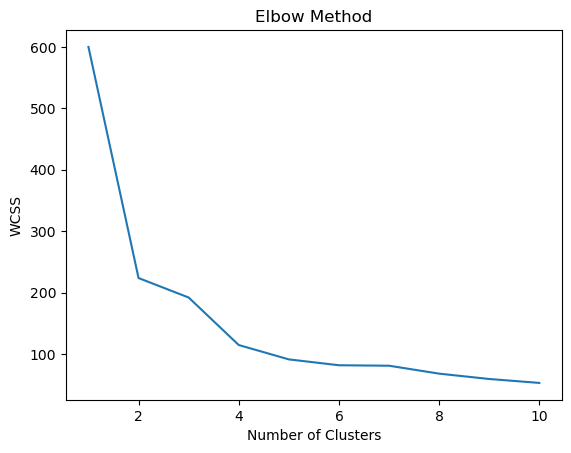

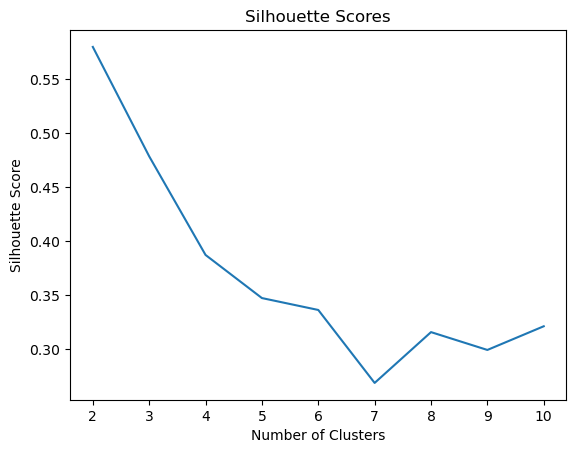

In [115]:
#Determining the Optimum Number of Clusters
# Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [125]:
#Clustering the Data
#Assuming the optimum number of clusters is determined to be 3 from the above methods
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
iris['Cluster'] = clusters

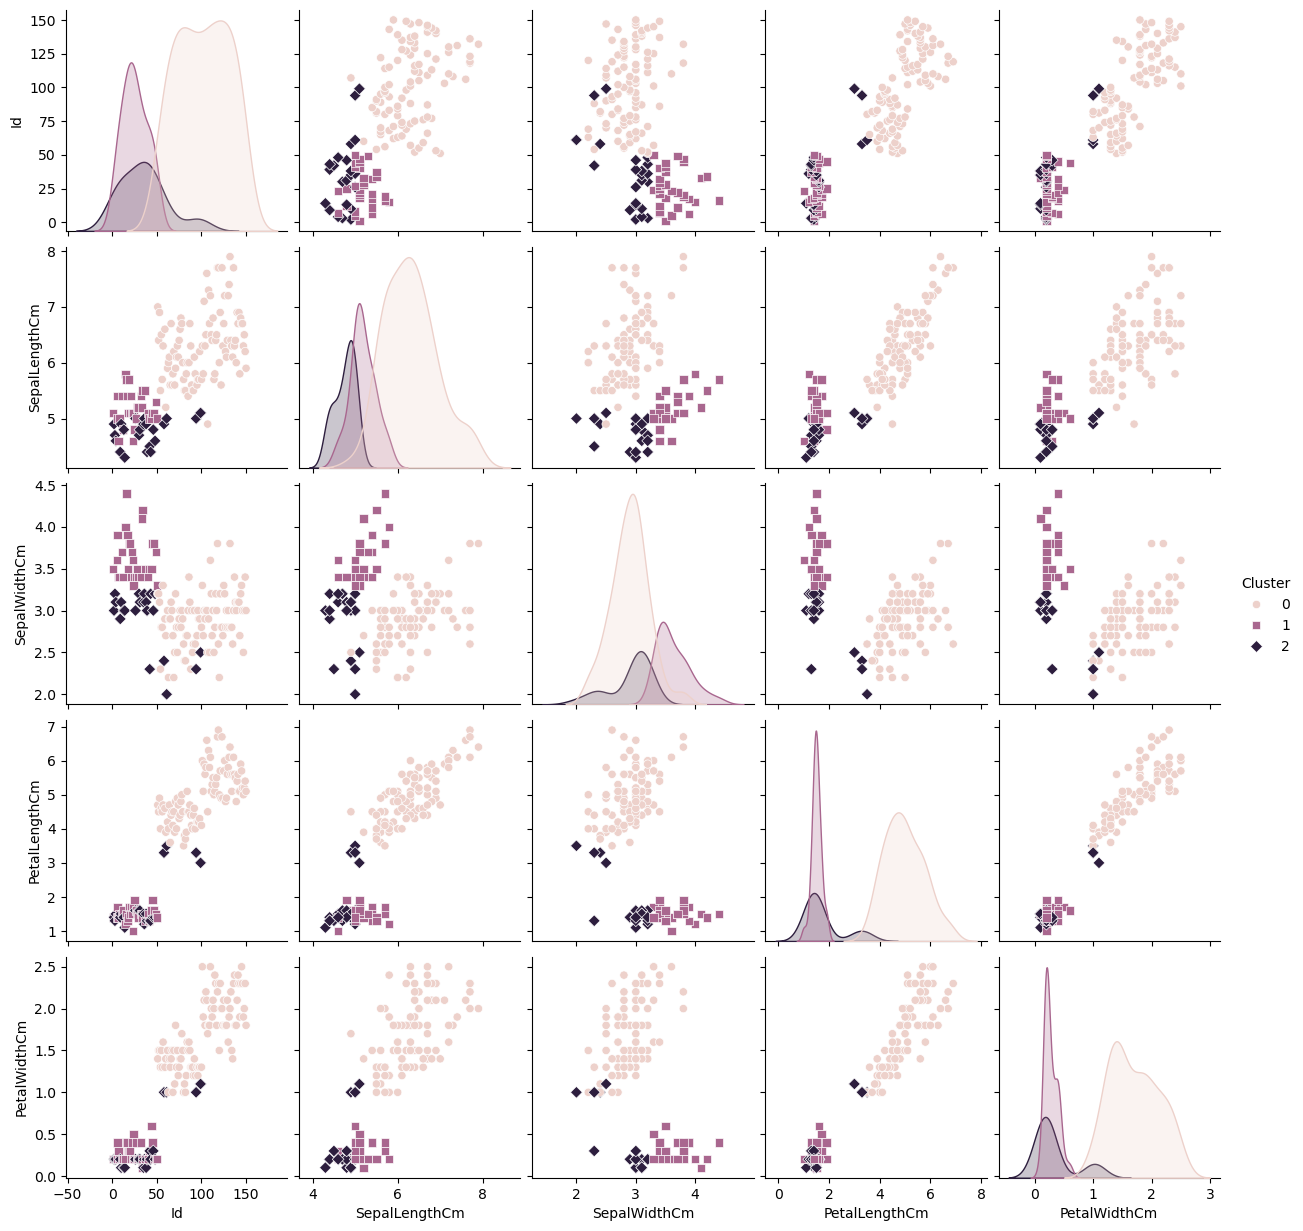

In [127]:
# Step 6: Visualize the Clusters
# Using a pairplot to visualize clusters
sns.pairplot(iris, hue='Cluster', markers=["o", "s", "D"])
plt.show()